In [1]:
# fast trigonometry

# 1. Arctan

In [1]:
import numpy as np

In [2]:
def quart(x):
    m = x.shape[0]
    X = np.empty((m, 4))
    X[:,0] = x ; X[:,1] = x * x; X[:,2] = x * x * x ; X[:,3] = X[:,1] * X[:,1]
    return X

def cubic(x):
    m = x.shape[0]
    X = np.empty((m, 3))
    X[:,0] = x ; X[:,1] = x * x; X[:,2] = x * x * x
    return X

def quad(x):
    m = x.shape[0]
    X = np.empty((m, 2))
    X[:,0] = x ; X[:,1] = x * x;
    return X

def linear(x):
    X = np.expand_dims(x,1)
    return X

In [74]:
from sklearn.linear_model import LinearRegression
# 1. a + bx + cx^2 + dx^3a
met = cubic
def genDataAtan(_size, low, high):
    #x = np.clip(np.abs(np.random.randn(_size)) * (1) + 0.5,0, 1).astype(np.float32)
    x = np.linspace(low,high,_size)
    gt = np.arctan(x)
    return x, gt
_size = 1000000
low = 0.1
high = np.pi/2
x, gt = genDataAtan(_size, low, high)

In [75]:
def fitModel(x, met, gt, v=0):
    X = met(x)
    model = LinearRegression()
    model.fit(X, gt)
    if v: print(model.coef_)
    if v: print(model.intercept_)
    return X, model
X, model = fitModel(x, met, gt, v = 1)

[ 1.13808047 -0.38254388  0.0446384 ]
-0.014960234466837141


In [76]:
def calcCost(model, X, gt, met, v, i):
    pred = model.predict(X)
    res = (pred - gt)
    idx = np.argmax(res)
    if v: print(i, "MAX err", "idx", idx, "diff", res[idx], "rad", X[idx,0], "Mean", np.mean(res))
    predict = cubic(np.array([[2]]))
    #if v: print(model.predict(predict), " vs ", np.arctan(predict))
    return res[idx]
res = calcCost(model, X, gt, met, 1, 0)

0 MAX err idx 148929 diff 0.0018128578175696797 rad 0.3190444451976824 Mean 5.538324021614471e-15


In [79]:
RR = 3
_size = 100000
Verbose = 0
_model = None
_err = 9999
sets = [[0.1,np.pi/2],[np.pi/2,np.pi],[np.pi,5]]
for i in range(RR):
    x, gt = genDataAtan(_size, sets[i][0], sets[i][1])
    X, model = fitModel(x, cubic, gt)
    res = calcCost(model, X, gt, cubic, Verbose, i)
    if res < _err:
        _err = res
        _model = model
        print(i, res, model.intercept_, model.coef_)


0 0.0018129325726796708 -0.014959792240434089 [ 1.13807883 -0.38254219  0.04463789]
1 0.0006059992927240909 0.23010930099207316 [ 0.75442543 -0.19739737  0.0197099 ]
2 0.0001347486387843766 0.6598880057410685 [ 0.32430175 -0.05199834  0.00313656]


In [29]:
lsize = 5000
xl = np.linspace(5,500,lsize)
gtxl = np.arctan(xl)

In [30]:
Xl = cubic(xl) #quad(xl)
modell = LinearRegression()
modell.fit(Xl, gtxl)
print(modell.coef_)
print(modell.intercept_)

[ 7.65325825e-04 -2.76103373e-06  3.04822121e-09]
1.50443794904616


In [23]:
pred = modell.predict(Xl)
res = (pred - gtxl)
idx = np.argmax(res)
print("MAX err", "idx", idx, "value", res[idx], "rad", Xl[idx,0])
predict = cubic(np.array([[5]]))
print(modell.predict(predict), " vs ", np.arctan(predict))

MAX err idx 0 value 0.13479516641067524 rad 5.0
[1.50819593]  vs  [[1.37340077 1.53081764 1.5627965 ]]


In [44]:
val = 6
print(np.arctan(val))
print(np.pi / 2 - 1 / val)

1.4056476493802699
1.4041296601282298


In [85]:
def fast_arctan(x):
    a0 = 1.10382257
    a1 = -0.36105955
    a2 = 0.04400221
    b = -0.00492334997743038
    sign = 1 if x >= 0 else -1
    if (abs(x) > np.pi):
        # https://math.stackexchange.com/questions/982838/asymptotic-approximation-of-the-arctangent/982859
        return (sign*(np.pi / 2) - 1/x)
    elif abs(x) < 5e-2:
        # for small x
        return x
    else:
        # by regression
        ax = abs(x)
        return sign * (b + ax * (a0 + ax * (a1 + a2 * ax)))
        #x2 = ax * ax
        #x3 = x2 * ax
        #return sign * (b + a0 * ax + a1 * x2 + a2 * x3)

In [85]:
val = -0.049
print(np.sin(val), "vs", fast_arctan(val))

-0.04898039418715918 vs -0.049


In [86]:
np.pi

3.141592653589793

# 2. Sine

In [184]:
from sklearn.linear_model import LinearRegression
# 1. a + bx + cx^2 + dx^3
_size = 1000000
x = np.clip(np.abs(np.random.randn(_size)) * np.pi/2, 0, np.pi/2)
gt = np.cos(x)
X = cubic(x)
model = LinearRegression()
model.fit(X, gt)
print(model.coef_)
print(model.intercept_)

[ 0.0385896  -0.61311836  0.11737913]
0.9970072879558844


In [212]:
pred = model.predict(X)
res = np.abs(pred - gt)
idx = np.argmax(res)
print("MAX err", "idx", idx, "value", res[idx], "rad", X[idx,0])
predict = cubic(np.array([[1.5788]]))
print(model.predict(predict), " vs ", np.cos(predict))


MAX err idx 366895 value 0.0029926210732348357 rad 2.3574102242678533e-06
[-0.00840623]  vs  [[-0.00800359 -0.79669873 -0.7011843 ]]


In [186]:
np.pi/2

1.5707963267948966

In [189]:
def fast_cos(x):
    c0 = 0.9970072879558844
    c1 = 0.0385896
    c2 = -0.61311836
    c3 = 0.11737913
    pi_2 = 1.5707963267948966
    ax = abs(x)
    if ax < 0.05:
        return 1
    if ax > pi_2:
        _x = ax / pi_2
        _ix = int(_x)
        _mx = _ix % 4
        ax = (_x - _ix) * pi_2
        sign = 1
        if _mx == 1:
            ax = pi_2 - ax
            sign = -1
        elif _mx == 2:
            sign = -1
        elif _mx == 3:
            ax = pi_2 - ax
    return sign * (c0 + ax * (c1 + ax * (c2 + ax * c3 )))

In [208]:
# https://en.wikipedia.org/wiki/Bhaskara_I%27s_sine_approximation_formula
def fast_sine(x):
    # version one
    pi = 3.141592653589793
    pi2 = pi * pi
    ax = abs(x)
    sign = 1 if x >= 0 else -1
    if ax < 0.05:
        return x
    if ax > pi:
        _x = ax / pi
        _ix = int(_x)
        _mx = _ix % 2
        ax = (_x - _ix) * pi
        sign = sign * (-1 if _mx == 1 else 1)
    return sign * (16 * ax * (pi - ax)) / ( 5 * pi2 - 4 * ax * (pi - ax))


In [209]:
val = -2393923 + 0.23232
print(fast_sine(val), "vs" , np.sin(val))

0.77655256622833 vs 0.7778960471964677


In [210]:
def fast_sineDeg(x):
    ax = abs(x)
    sign = 1 if x >= 0 else -1
    if ax < 2.86:
        return x*3.14159265/180
    elif ax > 180.:
        _x = ax / 180
        _ix = int(_x)
        _mx = _ix % 2
        ax = (_x - _ix) * 180
        sign = sign * (-1 if _mx == 1 else 1)
    return sign * (4 * ax) * (180 - ax) / (40500 - ax * (180 - ax))

In [177]:
val = 3.17
print(fast_sine(val) ,"vs", np.sin(val))

-0.02888087235926067 vs -0.02840352588360379


In [115]:
fast_sineDeg(1)

0.017453292500000002

# 3. Cosine

In [163]:
def fast_cosine(x):
    pi = 3.14159265
    pi_2 = pi / 2
    pi2 = pi*pi
    ax = abs(x)
    sign = 1 if x >= 0 else -1
    if ax < 0.05:
        return 1
    elif ax > pi_2:
        _x = ax / pi_2
        _ix = int(_x)
        _mx = _ix % 4
        ax = (_x - _ix) * pi_2
        sign = 1
        if _mx == 1:
            ax = pi_2 - ax
            sign = -1
        elif _mx == 2:
            sign = -1
        elif _mx == 3:
            ax = pi_2 - ax
        print(_x, _ix, _mx, ax, _x - _ix)
    ax2 = ax * ax
    return sign * (pi2 - 4 * ax2)/(pi2 + ax2)
    

In [213]:
x = 7
print(fast_cosine(x), "vs", np.cos(x), "vs", fast_cos(x), "vs", fast_sine(np.pi/2 - x))

4.456338411665178 4 0 0.7168146999999989 0.4563384116651781
0.7525752914431102 vs 0.7539022543433046 vs 0.7528670014882921 vs 0.7525752966917004


# 4. tangent

In [261]:
lsize = 5000
xl = np.linspace(1,1.55,lsize)
gtxl = np.tan(xl)
Xl = quart(xl) #quad(xl)
modell = LinearRegression()
modell.fit(Xl, gtxl)
print(modell.coef_)
print(modell.intercept_)

[-28167.94088605  34818.42234702 -19036.39933319   3885.68957825]
8503.98611444484


In [262]:
pred = modell.predict(Xl)
res = (pred - gtxl)
idx = np.argmax(res)
print("MAX err", "idx", idx, "value", res[idx], "rad", Xl[idx,0])
predict = quart(np.array([[1.2]]))
print(modell.predict(predict), " vs ", np.tan(predict))

MAX err idx 4653 value 3.2133702601222573 rad 1.5119323864772956
[3.45309259]  vs  [[ 2.57215162  7.60182606 -6.30868676 -1.81835207]]


In [263]:
def fast_tan(x):
    t0 = 0.0031084695854767252
    t1 = 0.9140496
    t2 = 0.53540681
    t3 = -0.85751509
    t4 = 0.9570163
    signX = 1 if x >= 0 else -1
    ax = abs(x)
    if ax < 0.05:
        return x
    if ax > 1:
        _x = ax / pi_2
        _ix = int(_x)
        _mx = _ix % 2
        ax = (_x - _ix) * pi_2
        if _mx == 1:
            ax = pi_2 - ax
            sign = -1
        else:
            sign = 1
        if ax < 0.05:
            return x
        if ax > 1:
            x2 = ax * ax
            return signX * (ax * (945 - x2 * (105 - x2))) / (945 - x2 * (420 - 15 * x2))
    return signX * (t0 + ax * (t1 + ax * (t2 + ax * t3 + ax * t4)))
    

In [267]:
x = 45
print(fast_tan(x), "vs", np.tan(x))

2.8849825963875264 vs 1.6197751905438615


# 5. Arcsine

# 6. Arcosine


In [3]:
import numpy as np
import matplotlib.pylab as plt

In [13]:
dat  = open("diff.bin", "rb").read()
dat = np.fromstring(dat, np.float32)
dat = dat.reshape(-1,4).T

C:\Users\takchoi\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


In [14]:
logdiff = np.log2(dat)

C:\Users\takchoi\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


In [16]:
xaxis = np.arange(4000) * 3.14 / 1000 - 3.14 * 2

Text(0.5, 0, 'angle(radian)')

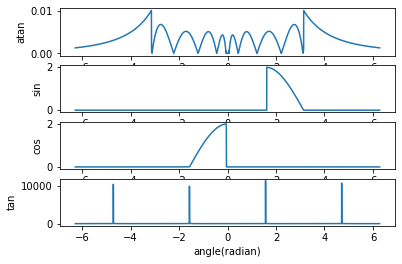

In [23]:
fig = plt.figure()
ax = [0,0,0,0]
name = ["atan", "sin", "cos", "tan"]
for i in range(4):
    ax[i]= fig.add_subplot(4,1,i+1)
    ax[i].plot(xaxis, dat[i])
    ax[i].set_ylabel(name[i])
ax[3].set_xlabel('angle(radian)')